# Week 1, Class 1: Introduction to Machine Learning in Healthcare
## Hands-on Lab: Google Colab Setup and Medical Data Exploration

**Course:** AI/ML in Medicine and Healthcare  
**Module:** Week 1 - Foundations  
**Lab Type:** Individual Work

---

## Learning Objectives
By the end of this lab, you will be able to:
1. Navigate and use Google Colab effectively
2. Mount Google Drive for file persistence
3. Load and explore a medical dataset
4. Perform basic data analysis with NumPy and pandas
5. Create visualizations with matplotlib

---

## Part 1: Welcome to Google Colab! 🚀

Google Colab is a free cloud-based Jupyter notebook environment. It provides:
- Free GPU access (with limits)
- Pre-installed ML libraries
- Easy sharing and collaboration
- Integration with Google Drive

### Colab Basics
- **Run a cell:** Shift+Enter or click the play button
- **Add cell:** Click "+Code" or "+Text" buttons
- **Save:** File → Save or Ctrl+S
- **Share:** Click "Share" button (top right)


In [1]:
# Let's start with a simple test
print("Hello, AI/ML in Medicine!")
print("You're running Python in the cloud! ☁️")

# Check Python version
import sys
print(f"\nPython version: {sys.version}")

Hello, AI/ML in Medicine!
You're running Python in the cloud! ☁️

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


### Mounting Google Drive

⚠️ **IMPORTANT:** Mount your Google Drive to save your work persistently!

Without this, your files will disappear when the Colab session ends.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

print("✓ Google Drive mounted successfully!")
print("Your files are now accessible at: /content/drive/MyDrive/")

Mounted at /content/drive
✓ Google Drive mounted successfully!
Your files are now accessible at: /content/drive/MyDrive/


---

## Part 2: Essential Libraries for Medical ML 📚

In [3]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.0.2
Pandas version: 2.2.2


---

## Part 3: Loading the Diabetes Dataset 🏥

We'll use the UCI Pima Indians Diabetes dataset:
- **768 patient records**
- **8 features:** pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree, age
- **Target:** diabetes diagnosis (0 = no, 1 = yes)

This dataset is perfect for learning ML fundamentals!

In [4]:
# Load diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']

df = pd.read_csv(url, names=column_names)

print("✓ Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"  - {df.shape[0]} patients")
print(f"  - {df.shape[1]} columns (8 features + 1 target)")

✓ Dataset loaded successfully!

Dataset shape: (768, 9)
  - 768 patients
  - 9 columns (8 features + 1 target)


### First Look at the Data

In [5]:
# Display first few rows
print("First 5 patients in the dataset:\n")
df.head()

First 5 patients in the dataset:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Get basic information about the dataset
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Statistical summary
print("Statistical Summary:\n")
df.describe()

Statistical Summary:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 🤔 Observation Questions

Look at the statistical summary above and answer:
1. What's the average glucose level?
2. What's the age range of patients?
3. Do you notice any unusual values? (Hint: Can blood pressure be 0?)

**Write your observations here:**
1. 120.894531
2. 21-81
3. Minimum values being 0 for Glucose, BloodPressure, SkinThickness, Insulin and BMI. Also, really high values, like 67 BMI.

---

## Part 4: Data Exploration with NumPy 🔢

In [8]:
# Convert to NumPy arrays for practice
glucose = df['Glucose'].values
bmi = df['BMI'].values

print("NumPy Array Operations:")
print("="*50)
print(f"Glucose - Mean: {np.mean(glucose):.2f}, Std: {np.std(glucose):.2f}")
print(f"BMI - Mean: {np.mean(bmi):.2f}, Std: {np.std(bmi):.2f}")
print(f"\nGlucose range: {np.min(glucose):.0f} to {np.max(glucose):.0f}")
print(f"BMI range: {np.min(bmi):.1f} to {np.max(bmi):.1f}")

NumPy Array Operations:
Glucose - Mean: 120.89, Std: 31.95
BMI - Mean: 31.99, Std: 7.88

Glucose range: 0 to 199
BMI range: 0.0 to 67.1


In [9]:
# Array operations - vectorization is powerful!
# Let's categorize BMI

# BMI categories: <18.5 (underweight), 18.5-25 (normal), 25-30 (overweight), >30 (obese)
underweight = np.sum(bmi < 18.5)
normal = np.sum((bmi >= 18.5) & (bmi < 25))
overweight = np.sum((bmi >= 25) & (bmi < 30))
obese = np.sum(bmi >= 30)

print("BMI Distribution:")
print(f"  Underweight (<18.5): {underweight}")
print(f"  Normal (18.5-25): {normal}")
print(f"  Overweight (25-30): {overweight}")
print(f"  Obese (>30): {obese}")

BMI Distribution:
  Underweight (<18.5): 15
  Normal (18.5-25): 102
  Overweight (25-30): 179
  Obese (>30): 472


---

## Part 5: Visualizing Medical Data 📊

Visualization is crucial in medical ML for:
- Understanding data distributions
- Identifying outliers and anomalies
- Communicating insights to clinicians
- Debugging models

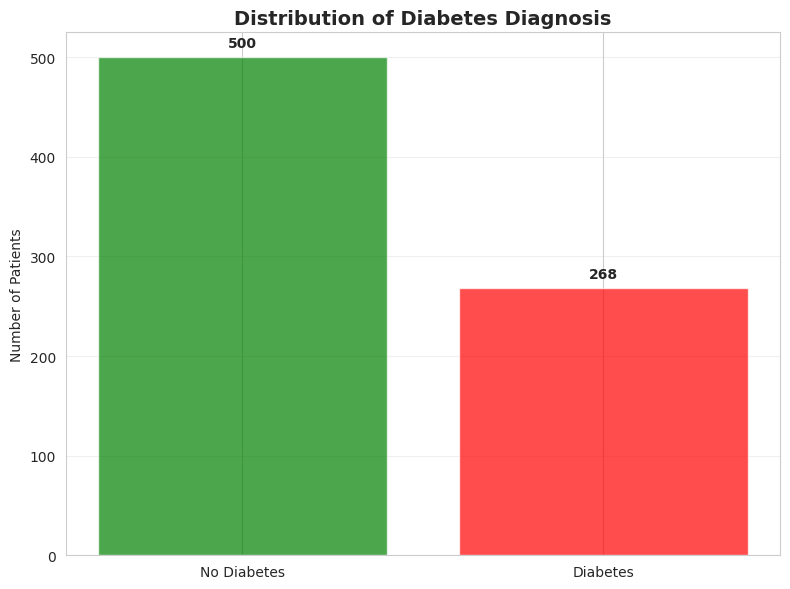

Class distribution:
  No diabetes: 500 (65.1%)
  Diabetes: 268 (34.9%)


In [10]:
# Distribution of diabetes outcomes
plt.figure(figsize=(8, 6))
outcome_counts = df['Outcome'].value_counts()
plt.bar(['No Diabetes', 'Diabetes'], outcome_counts.values, color=['green', 'red'], alpha=0.7)
plt.title('Distribution of Diabetes Diagnosis', fontsize=14, fontweight='bold')
plt.ylabel('Number of Patients')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(outcome_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Class distribution:")
print(f"  No diabetes: {outcome_counts[0]} ({outcome_counts[0]/len(df)*100:.1f}%)")
print(f"  Diabetes: {outcome_counts[1]} ({outcome_counts[1]/len(df)*100:.1f}%)")

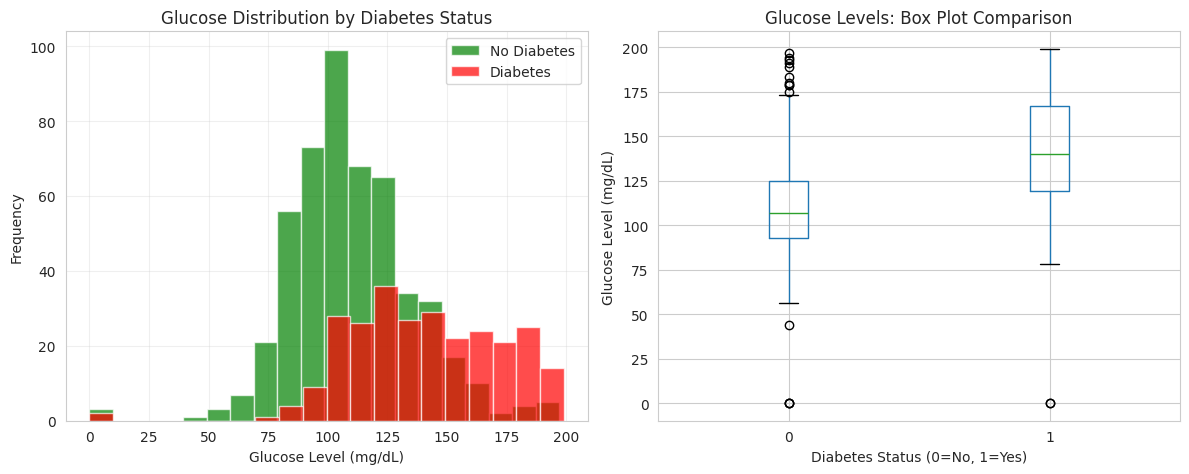

In [11]:
# Glucose distribution by diabetes status
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
plt.hist(df[df['Outcome'] == 0]['Glucose'], bins=20, alpha=0.7, label='No Diabetes', color='green')
plt.hist(df[df['Outcome'] == 1]['Glucose'], bins=20, alpha=0.7, label='Diabetes', color='red')
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('Frequency')
plt.title('Glucose Distribution by Diabetes Status')
plt.legend()
plt.grid(alpha=0.3)

# Subplot 2: Box plot
plt.subplot(1, 2, 2)
df.boxplot(column='Glucose', by='Outcome', ax=plt.gca())
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Glucose Level (mg/dL)')
plt.title('Glucose Levels: Box Plot Comparison')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

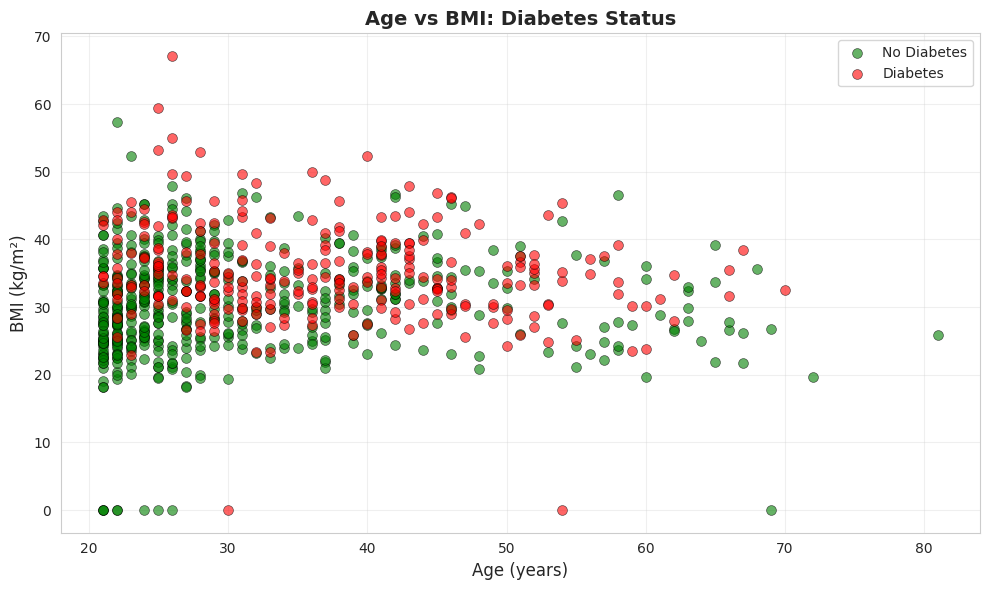


💡 Observation: Look for patterns! Do diabetic patients tend to cluster in certain regions?


In [12]:
# Scatter plot: BMI vs Age, colored by diabetes status
plt.figure(figsize=(10, 6))

# Plot non-diabetic patients
no_diabetes = df[df['Outcome'] == 0]
plt.scatter(no_diabetes['Age'], no_diabetes['BMI'],
            alpha=0.6, s=50, c='green', label='No Diabetes', edgecolors='black', linewidth=0.5)

# Plot diabetic patients
diabetes = df[df['Outcome'] == 1]
plt.scatter(diabetes['Age'], diabetes['BMI'],
            alpha=0.6, s=50, c='red', label='Diabetes', edgecolors='black', linewidth=0.5)

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('BMI (kg/m²)', fontsize=12)
plt.title('Age vs BMI: Diabetes Status', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Observation: Look for patterns! Do diabetic patients tend to cluster in certain regions?")

Diabetic patients tend to have BMI a little higher and a little more age but there is no clear cluster for diabetic patients in this graph.

---

## Part 6: Correlation Analysis 🔗

Understanding feature correlations is crucial for:
- Feature selection
- Understanding relationships
- Avoiding multicollinearity

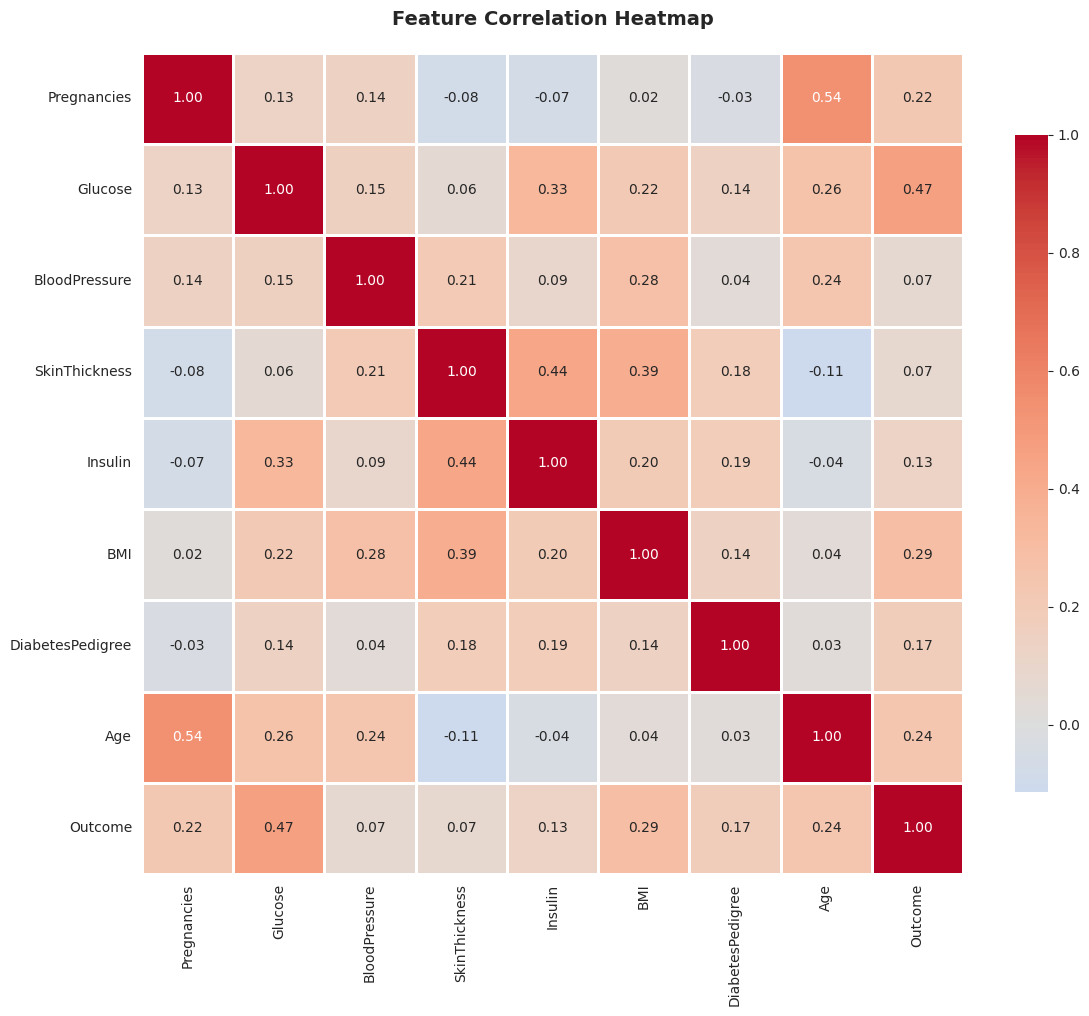


Correlations with Diabetes Outcome:
Glucose             : +0.467
BMI                 : +0.293
Age                 : +0.238
Pregnancies         : +0.222
DiabetesPedigree    : +0.174
Insulin             : +0.131
SkinThickness       : +0.075
BloodPressure       : +0.065


In [13]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlations with outcome
print("\nCorrelations with Diabetes Outcome:")
print("="*50)
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False)
for feature, corr in outcome_corr.items():
    if feature != 'Outcome':
        print(f"{feature:20s}: {corr:+.3f}")

### 🤔 Analysis Questions

Based on the correlation heatmap:
1. Which feature has the strongest correlation with diabetes outcome?
2. Are there any highly correlated features (excluding the diagonal)?
3. Would you consider removing any features? Why?

**Your answers:**
1. Glucose
2. There is a high correlation between Age and Pregnancies.
3. Yes, we could remove features like SkinThickness and BloodPressure. They have very little correlation with Diabetes Outcome and would probably confuse the model more than help it.

---

## Part 7: Your First ML Insight! 🎯

Let's make a simple observation about glucose levels and diabetes risk.

In [14]:
# Compare average glucose between groups
avg_glucose_no_diabetes = df[df['Outcome'] == 0]['Glucose'].mean()
avg_glucose_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()

print("Average Glucose Levels:")
print("="*50)
print(f"No Diabetes: {avg_glucose_no_diabetes:.1f} mg/dL")
print(f"Diabetes:    {avg_glucose_diabetes:.1f} mg/dL")
print(f"\nDifference:  {avg_glucose_diabetes - avg_glucose_no_diabetes:.1f} mg/dL")
print(f"({(avg_glucose_diabetes/avg_glucose_no_diabetes - 1)*100:.1f}% higher in diabetic patients)")

# Simple rule-based prediction
threshold = 120  # mg/dL
rule_based_predictions = (df['Glucose'] > threshold).astype(int)
accuracy = (rule_based_predictions == df['Outcome']).mean()

print(f"\n🎯 Simple Rule: 'Predict diabetes if glucose > {threshold}'")
print(f"   Accuracy: {accuracy*100:.1f}%")
print(f"\n💡 This is machine learning at its simplest!")
print(f"   We'll learn to do much better with sophisticated models!")

Average Glucose Levels:
No Diabetes: 110.0 mg/dL
Diabetes:    141.3 mg/dL

Difference:  31.3 mg/dL
(28.4% higher in diabetic patients)

🎯 Simple Rule: 'Predict diabetes if glucose > 120'
   Accuracy: 70.4%

💡 This is machine learning at its simplest!
   We'll learn to do much better with sophisticated models!


---

## Part 8: Save Your Work 💾

In [15]:
# Create a summary report
summary = {
    'Total Patients': len(df),
    'Diabetic': outcome_counts[1],
    'Non-diabetic': outcome_counts[0],
    'Avg Age': df['Age'].mean(),
    'Avg Glucose': df['Glucose'].mean(),
    'Avg BMI': df['BMI'].mean(),
}

summary_df = pd.DataFrame([summary])

# Save to Google Drive (update path with your folder)
# output_path = '/content/drive/MyDrive/AI_ML_Healthcare/Week1_Summary.csv'
# summary_df.to_csv(output_path, index=False)
# print(f"✓ Summary saved to: {output_path}")

print("\nData Summary:")
print(summary_df.T)


Data Summary:
                         0
Total Patients  768.000000
Diabetic        268.000000
Non-diabetic    500.000000
Avg Age          33.240885
Avg Glucose     120.894531
Avg BMI          31.992578


---

## 🎓 Wrap-Up and Reflection

### What You've Learned:
✓ Set up and navigate Google Colab  
✓ Loaded a real medical dataset  
✓ Performed exploratory data analysis  
✓ Created meaningful visualizations  
✓ Identified relationships in data  
✓ Made your first (simple) prediction!  

### Next Steps:
1. Save this notebook to your Google Drive
2. Try modifying the visualizations
3. Explore other features in the dataset
4. Read Chapter 1 of the textbook

### 📝 Reflection Questions:
1. What surprised you most about the data?
2. What challenges do you anticipate in building ML models for healthcare?
3. What questions do you have for the next class?

**Your reflections:**
1. The average BMI being 32, which is really high.
2. Missing data and class imbalances (diseases tend to be less common then non-disease cases)
3. How do we deal with class imbalances without wasting data?

---

## 🏠 Optional Homework Challenge

Try these extensions:
1. Explore the relationship between Age and Pregnancies
2. Create a histogram showing the distribution of all features
3. Identify potential data quality issues (zeros in blood pressure, etc.)
4. Compare BMI distributions between diabetic and non-diabetic patients

---

**Great job completing your first lab! 🎉**  
See you in Class 2!

---

## Homework



### Explore the relationship between Age and Pregnancies

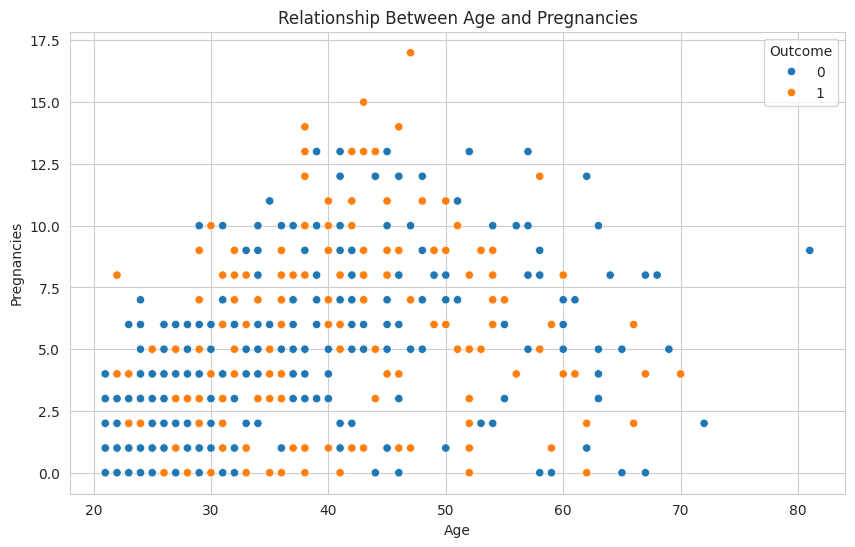


Correlation between Age and Pregnancies: 0.544


In [18]:
plt.figure()
sns.scatterplot(data=df, x="Age", y="Pregnancies", hue="Outcome")
plt.title("Relationship Between Age and Pregnancies")
plt.show()

correlation = df["Age"].corr(df["Pregnancies"])
print(f"\nCorrelation between Age and Pregnancies: {correlation:.3f}")

There is a strong correlation between age and pregnancies.

---

### Create a histogram showing the distribution of all features

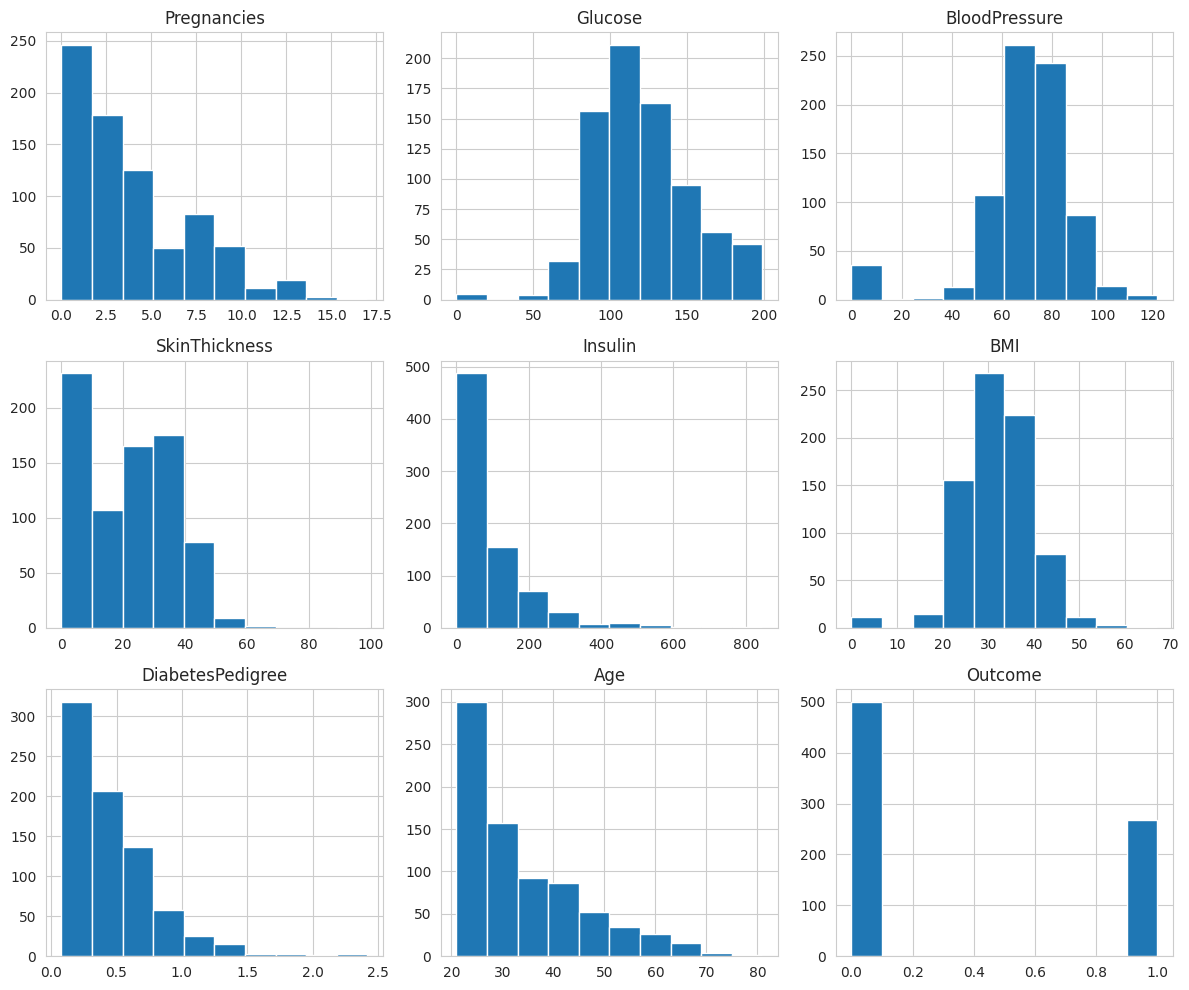

In [19]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

---

### Identify potential data quality issues (zeros in blood pressure, etc.)

In [21]:
# Columns that should not contain zeros
cols_with_no_zero = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

print("\nPotential Data Quality Issues (Zero Counts):\n")
for col in cols_with_no_zero:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zero values")


Potential Data Quality Issues (Zero Counts):

Glucose: 5 zero values
BloodPressure: 35 zero values
SkinThickness: 227 zero values
Insulin: 374 zero values
BMI: 11 zero values


---

### Compare BMI distributions between diabetic and non-diabetic patients

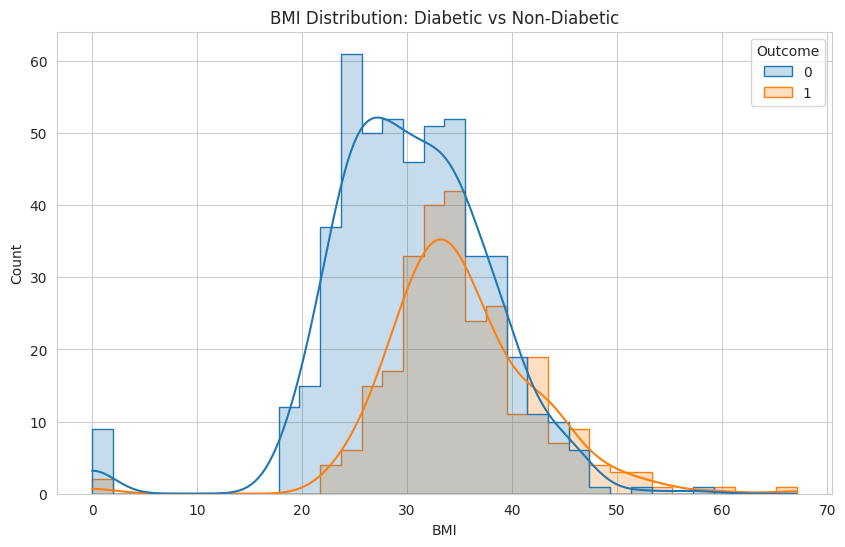

In [23]:
plt.figure()
sns.histplot(data=df, x="BMI", hue="Outcome", kde=True, element="step")
plt.title("BMI Distribution: Diabetic vs Non-Diabetic")
plt.show()